In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
import pandas as pd

In [3]:
with open('../s1000_zdisplacement.dat', 'r') as file:
    count = 0;
    times, displacement = np.array([]), np.array([]);
    for line in file:
        items = line.split(' ');
        displacement = np.append(displacement, float(items[0]));
        times = np.append(times, float(count)*1e-6);
        count = count + 1;

In [4]:
#FFT
time_step = float(times[1] - times[0])
sample_freq = fftpack.fftfreq(displacement[:].size, d=time_step)
y_fft = fftpack.fft(displacement[:])
pidxs = np.where(sample_freq > 0)
freqs, power = sample_freq[pidxs], np.abs(y_fft)[pidxs]
freq = freqs[power.argmax()]

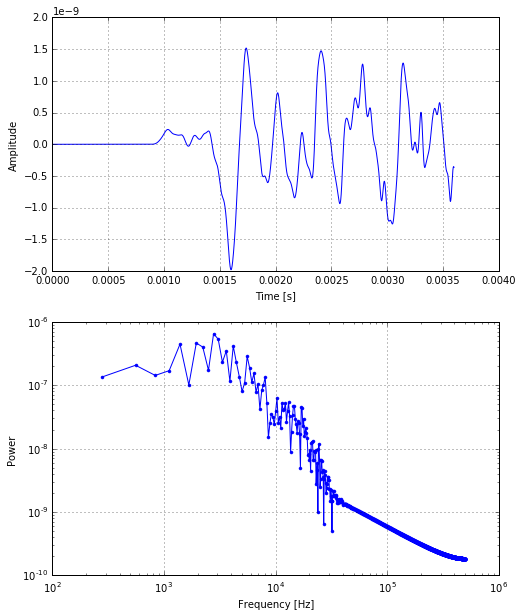

In [6]:
#Plot
plt.figure(figsize=(8,10))
plt.subplot(2, 1, 1)
plt.plot(times,displacement,'b-', linewidth=1)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid(True)
#
plt.subplot(2, 1, 2)
plt.loglog(freqs, power,'b.-',lw=1)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power')
plt.grid(True)

plt.show()